# CHAPTER 4 모델 훈련
* Data -> 변수 1개, x -> y
* 연속형 데이터
    - 값을 예측

* 분류형(범주) 데이터
    - class를 분류

## 선형회귀 모델
* 선에서 벗어난 오차를 '입십론($\epsilon$)'이라 부름
    - f(Xn) + 입실론 = Yn
    - 에측            실제값
* 각각의 '입실론'을 최소화시키는게 선형 회귀 모델임
    - $ f(X) = \beta0 + \beta1X + \epsilon(범위) $
        + predict=$\beta0+\beta1X$
    - 오차 : 우리가 인정할 수 있어야 한다.
        + \epsilon_i$의 분포가 정규분포 안쪽 -> 인정 가능
    - 정규 분포는 : E(입실론i) = 0
    
### Cost function
* $\displaystyle \sum_{i=1}^n (Y_i-\widehat{Y_i})^2$
* Cost function이 최소화 되는 값을 찾는게 목표!
* root 금지 - 미분이 어렵게 됨
* 거리의 방향을 제거한
* 예)
    - 범위 : 1 ~ 6
    - predict function : 2
    - cost : (1-2)^2 + (6-1)^2 = 17
    - predict function : 3
    - cost : (1-3)^2 + (6-3)^2 = 13
    - predict function : 4
    - cost : (1-4)^2 + (6-4)^2 = 13
    - 그래프는 곡선($\cup$)일 것이다.
        + 그래프의 최하단이 cost값을 최소화 한다.
        
* $f(\beta_{0},\beta_{1})$
    + 변수 $\beta_{0}, \beta_{1}$

* $\beta$가 2개면 그래프가 입체적으로 변함 곡선뿔(아래로 볼록?)같은 형태

### 미분
* 기울기 0을 찾을 때 사용 가능
    - __기울기가 0이 cost값이 최소__
    
* $\beta$가 1개
    - 그냥 '미분'함
    - $\beta_0$에 대해 미분

* $\beta$가 2개
    - 다변량 '미분'함
    - $\beta_{0}, ..., \beta_{1}$에 대해 미분

#### 미분
* __접하는 선(line)의 기울기__
    - 순간 속력(순간 변화량)
* 이동거리 : 2km -> 3시간
* 평균속력 : 2/3 -> km/시간
    - 평균속력 : 거리의 변화량 / 시간의 변화량 = __기울기__

$\displaystyle \lim_{\vartriangle t \to 0}  {f(t) - f(t+\vartriangle t) \over \vartriangle{t}}$ : 순간 속력

* __기울기 = 0 => 미분 = 0__

## Cost function의 미분
### 1) $\beta$가 1개
* $cost'(\beta_{0})$, ${d \over d\beta_{0}} cost(\beta_{0})$
* ${d \over d\beta_{0}} cost(\beta_{0})$ = $0 -2Y_i +2\beta_0$
    - $\beta_0$ = $\sum Y_i$
    
### 2) $\beta$가 2개 (편미분, 다변수 미분)
* 이미지 참조 : 1.pdf

* $\partial$(파셜)
    - $\partial cost(\beta_{0},\beta_{1}) \over \partial \beta_{0} = 0$
    - $\partial cost(\beta_{0},\beta_{1}) \over \partial \beta_{1} = 0$
    
* 변수 2개 식 2개 => 연립 방정식
    - 이미지 참조 : 1.pdf
    
* 변수 3개, 미분 3번, $\beta_0, \beta_1, \beta_2$ => 연립방정식
    - $\beta_0 + \beta_1 X_1 + \beta_2 X_2$
    
### 다변량 '미분'이 '일반화'되면?
* __정규방정식__이 나타난다.
* 정규방정식의 표기법?
    - 이미지 참조

### cost function
* 정규방적식 사용은 컴퓨터에게 부담이 된다.
    - => $ \sum_{i=1}^n (XB-y)^2$ '미분'하면 => 0
    - $0 - 2X^T(XB-y)$
    - ...
    - $B = (X^TX)^{-1} X^Ty$ : 정규 방정식


In [15]:
# 선형회귀
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

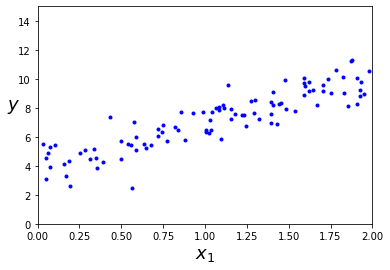

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## 정규 방정식
* 선형회귀 풀이 1번째

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [17]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [18]:
theta_best  # 절편, 기울기

array([[3.86501051],
       [3.13916179]])

In [19]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

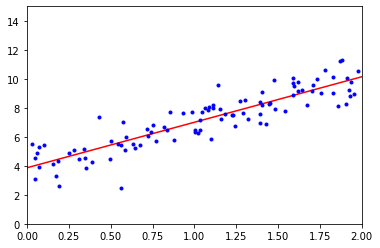

In [20]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.14609228]), array([[2.92292157]]))

In [15]:
lin_reg.predict(X_new)

array([[4.14609228],
       [9.99193541]])

### 유사역행렬
* 책 참고 : p163

## 경사 하강법
* 선형회귀 풀이 2번째
* __Cost를 줄이기 위해 반복적으로 기울기를 계산하여, 변수의 값을 변경해나가는 과정__
* Cost functinon => cost($\beta$)
    - 목적 : $cost'(\beta) = 0 인 \beta을 찾는것$
    - 방법 1 : $\beta \in R^n$에 대해 무차별 대입
    - 방법 2 : 적당한 규칙을 적용 => 순차적으로 업데이트 => 결과
        + 적당한 규칙 : 이미지 참조(1.pdf)
        + 기울기가 0이 될 때까지 반복 => B = B - n*0 = B
        
* 정규방적식 풀이는 컴퓨터에게 엄청난 부담을 준다.
* 에타($\eta$) : 학습률(Learning rate), 사용자가 정하는 값, 하이퍼파라미터
* 베타($\beta$) : 구할려는값(기울기, 절편)

## 배치 경사 하강법의 종류
* BATCH(배치) 사이즈를 기준으로 종류를 나눔
1. 많은 피처(Feature, 특성)를 몽땅 학습시키면
    - 문제 : 오래거림, 메모리 부족
2. 데이터를 나눠서 여러번의 학습 과정

1. epoch, step, batch size
    - epoch : 전체 샘플(Sample) 한 바퀴 돌면, 1 epoch
    - step : 기울기(가중치, Weight),  편향(절편, Bias) 1회 업데이트, 1 setp
    - batch size : 1 step에서 사용한 데이터의 수
        + 몇 개를 학습 시킬지 정함

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


## GD(Gradient descent,경사 하강법)
* Full Batch GD
* Batch size = m = 전체 데이터
* matrix 연산
    - m번 계산후 업데이트

## SGD(Stochastic Gradient Descent, 확률적 경사 하강법)
* batch size = m = 1 (랜덤으로 추출된 1개의 데이터를 사용하여 업데이트)
* 벡터단위 연산
    - 장점 : 업데이트가 빠르다. (1번 계산으로 업데이트)
    - 단점 : 행렬 연산의 장점이 사라진다.
    
## Mini Batch GD
* batch size = m = 사용자가 지정 $2^n$로 지정
    - 장점 : matrix 연산 사용
    - 단점 : SGD보다 느리다.

In [19]:
# GD(Gradient descent,경사 하강법)
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [20]:
theta

array([[4.14609228],
       [2.92292157]])

In [38]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

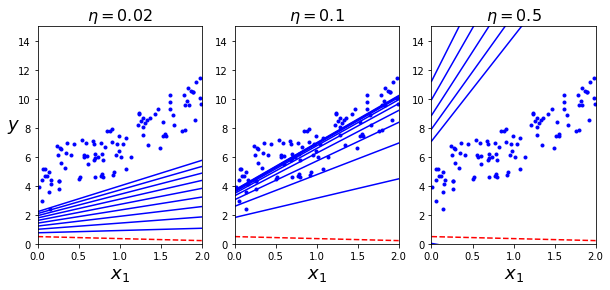

In [39]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

In [22]:
# 확률적 경사 하강법
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

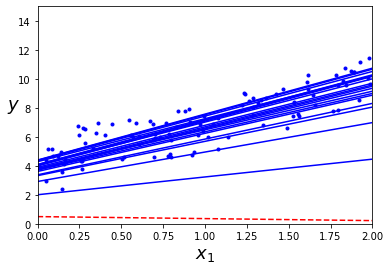

In [23]:
# 확률적 경사 하강법
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
plt.show()                                           # 책에는 없음

In [24]:
theta

array([[4.12126411],
       [2.86741336]])

In [63]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
# 에포크 : 1000, 학습률 : 0.1

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15222941]), array([2.93106716]))

In [27]:
#
# 미니배치 경사 하강법
# 

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [28]:
theta

array([[4.13258672],
       [2.91227028]])

In [40]:
#
# 3개 비교
#
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

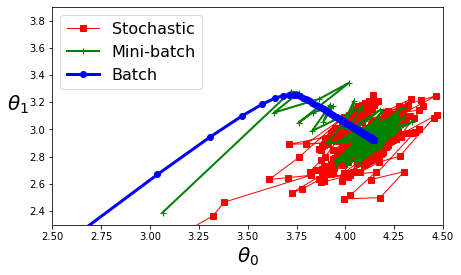

In [41]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [ ]:
## Cost function
* 입력한 Training Set에 대하여 가장 적합한 직선을 우리가 가질 수 있게 해줌 = 목표
* Cost = (h - y)^2
    - Cost = 예측된 결과 값(h) - 실제 결과 값(y)
    - 음수로 값이 없어지면 안되기 때문에 제곱함

# 개인 정리
1. 선형 회귀에서 미분을 사용하는 이유?
  - __Cost function__의 최소값을 구하기 위해서
  - 미분을 사용하면 기울기 0을 구할 수 있어서, 기울기 0이 최소값
2. 미분이 순간속력을 구하는 거고, 미분은 방향(-/+)을 가지고 있는게 맞나요?
  - 미분 : 순간적인 변화
  - yes
3. 구하는 $\beta$는 '기울기'와 '절편'을 뜻하는가?
  - yes
4. cost function이 MSE와 같다고 할수 있나요?
  - MSE 는 Cost Function의 한 종류 입니다

## 다항 회귀
* 선형이 아닌 문제(다항 방정식, 비선형)를 해결할 때 사용
    - 선형 : 직선(x=y), 평면(x+y=z), 직방체(x+y+z=h)

In [28]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [29]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

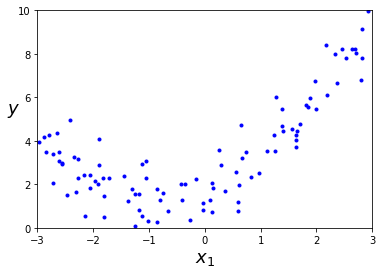

In [31]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
# degree : 차원
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [38]:
PolynomialFeatures?

Init signature:
PolynomialFeatures(
    degree=2,
    *,
    interaction_only=False,
    include_bias=True,
    order='C',
)
Docstring:     
Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree.
For example, if an input sample is two dimensional and of the form
[a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

Parameters
----------
degree : integer
    The degree of the polynomial features. Default = 2.

interaction_only : boolean, default = False
    If true, only interaction features are produced: features that are
    products of at most ``degree`` *distinct* input features (so not
    ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).

include_bias : boolean
    If True (default), then include a bias column, the feature in which
    all polynomial powers are zero (i.e. a column of ones - acts as an
    intercept term in a linear mode

* PolynomialFeatures : 선형 회귀 데이터-> 다항 회귀 데이터로 변경
    - (x=y)-> (x+x^2=y)
    - degree : n차 다항식으로 지정
        + degree 1 : 1,a 선형
        + degree 2 : 1,a,b
            * 1,a,b,a^2,b^2,ab
        + degree 2 : 1,a,b,c
            * 1,a,b,c, ab,ac,bc,...,a^3,b^3,c^3
    - include_bias : 편향(y절편) Flase -> sklearn.LinearRegression은 편향을 스스로 조절한다.

In [41]:
X_poly[0] # x, x^2

array([-0.75275929,  0.56664654])

In [43]:
poly_features.get_feature_names()

['x0', 'x0^2']

+ degree 1 : 1,a 선형
+ degree 2 : 1,a,b
    * 1,a,b,a^2,b^2,ab
+ degree 2 : 1,a,b,c
    * 1,a,b,c, ab,ac,bc,...,a^3,b^3,c^3

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

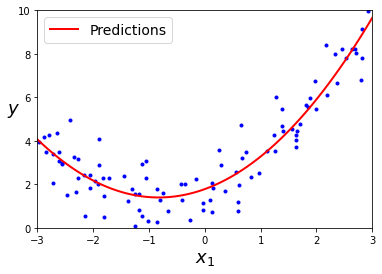

In [35]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

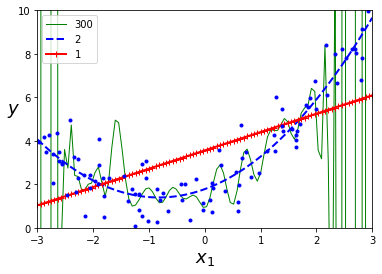

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()
# 300차 다항은 '과대적합'이 됨

In [69]:
# 학습 곡선 확인
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")  # 훈현세트
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")       # 검증세트
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

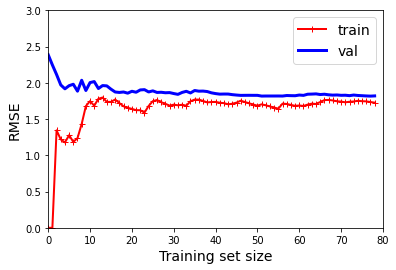

In [81]:
# 학습 곡선 확인(단순 선형 회귀 모델(직선))
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
plt.show()                                      # 책에는 없음

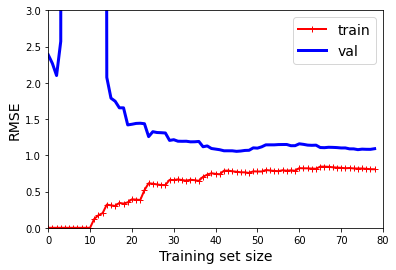

In [84]:
# 학습 곡선 확인(10차 다항 회귀 모델)
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
plt.show()                        # 책에는 없음

## 과대적합 / 과소적합
* model : 훈련 -> 99% 정확도, test -> 85% 정확

* 모델 문제의 이유
    - 원인1: model의 표현력이 좋은 경우 => 고차원, 매개변수가 많은 모델 => 복잡한 모델
    - 원인2: 데이터(데이터 편향, 개수가 적을 때)
1. Underfitting(high bias, 높은 편향)
2. Best
3. Overfitting (high variance, 높은 분산)

* 문제 해결
    - 기대한 값으로 training, test의 결과가 수렴해야 한다.
    - 많은 데이터를 많이 epoch한다.
    - 문제 : 데이터가 적은데 epoch이 늘어날수록 'Overfitting'이 심해짐

* overfitting 해결
    1. 데이터를 추가 (현실적으로 어려움 -> 비용)
    2. 학습을 적당히함 (epoch을 줄임)
    3. 모델 수정 -> New
        + 단순한 모델로 바꿈 -> 1. 차원을 낮춤, 2. Feature의 개수를 낮춤, 3. 정규화

#### 모델의 복잡도의 '평향/분산 트레이드오프'
* 커짐 : 분산이 늘고, 편향은 줄어듬
* 줄어듬 : 편향은 커지고 분산이 작아짐

## 규제가 있는 선형 모델
이미지 노트 참고 : 2.pdf

* 정규화 : 다항식의 차원규제
    - 100차원 -> 4차원 -> 2차원
    - $f(x) = \theta_0 + \theta_1 X + \theta_2 X^2 + ... + \theta_n X^n $ 
        + $\theta_0 + \theta_1 X + \theta_2 X^2$

* $\theta_0 = W_0  = b$ :기울기

* 제약 조건 (억제시킨다) -> 모델: $1 + 2X^2 + 3X^3$ ==$\theta_3$의 크기를 1이하로 만들어라==> 정규화된  model: $1 + 2X^2 + 0.5X^3$        

### 규제
* 손실함수 계산 : cost + 정규화 조건(제약조건)
    - 모델의 가중치를 제한함으로써 '규제'를 가함
    - 제약조건에 따라 릿지, 리쏘, 엘라스틱으로 나뉨
    - 규제항은 훈련하는 도안에만 '비용 함수'에 추가함

* $\lambda$가 커짐(하이퍼파라미터)
    - 모델이 단순해짐
    - 1000x^3 + 1000x 3 -규제-> 에측함수(0.1x^3 1000x+3) + 규제(999.9.x^3)
    - 정확도가 떨어짐 -> underfitting 발생
    
* $\lambda$가 작음
    - 모델이 복잡
    - 1000x^3 + 1000x 3 -규제-> 에측함수(999x^3 1000x+3)(규제가 의미가 없어짐)
    - overfitting 발생

* $L_2$ 정규화 : 릿지 회귀 $\theta_i^2$ -> 미분이 쉽다 -> 방정식 가능
* $L_1$ 정규화 : 라쏘 회귀 $|\theta_i|$ -> 미분이 복잡 -> 방정식 X => 경사하강법 사용

### 릿지회귀
* MSE + 정규화 조건($\sum \theta_j^2$)
    - 이미지 노트 참고 : 2.pdf
    
* goal : $1 + 2x^2$ <- predict function : $1 + 4x^2$
    - 릿지회귀 : $\theta_2 = \sqrt{2}$

**식 4-8: 릿지 회귀(티호노프 규제)의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$

In [90]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [94]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])
# solver="sag" : 경사하강법 사용
# solver="saga" : sag의 개량 버전

array([[1.5507201]])

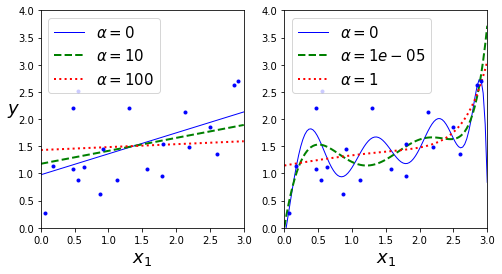

In [95]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [96]:
# 정규방적식 사용했을 때
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [97]:
# 확률적 경사 하강법을 사용했을 때
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

### 라쏘 회귀
* 이미지 노트 참고 : 2.pdf
* 특징
    - 덜 중요한 특성의 가중치를 제거하려고 함
    - 자동으로 특성 선택하고 '희소 모델'을 만듦

**식 4-10: 라쏘 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$

D:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


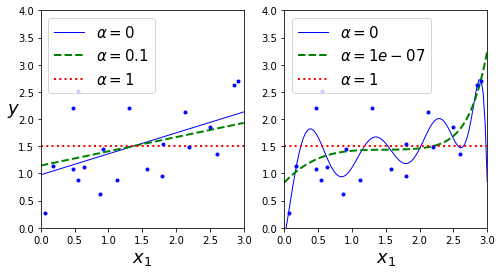

In [60]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

In [98]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])
#
# lasso 대신 SGDRegressor(penalty="l1") 을 사용할 수도 있음
#

array([1.53788174])

### Elastic Net
* 릿지 : 변수간의 상관관계가 높을수록, 좋은 성능
* 라쏘의 단점 : 상관관계가 높을수록, 릿지에 비해 성능이 않좋음

* Elastic Net
    - 릿소와 라쏘의 중간 정도의 성능으로 사용? 
    - 규제항 : 릿지와 리쏘의 규제항을 단순히 더해서 사용
        + 혼합 정도는 혼합 비율 r을 사용해 조절
        + r=0 : 릿지 회귀
        + r=1 : 리쏘 회귀
        

**식 4-12: 엘라스틱넷 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$

In [65]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [99]:
### 조기 종료
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

조기 종료 예제:

In [100]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, # warm_start=True : fit() 매서드가 이전 모델 파라미터에서 훈련을 이어감
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

그래프를 그립니다:

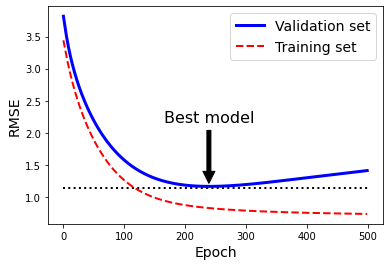

In [101]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [102]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

## 로지스틱 회귀(Logistic Regression)
* 자료
    - 수치형 자료
    - 범주형자료(사과,배)
        + class를 나눔
        
* 시그모이드(Sigmoid) 함수
    - S 곡선 함수를 표현할 때 씀
    - $f(x)= {1 \over 1+exp(-x)}$
        + $f(x)= {1 \over 1+e^{-x}}$
    - 지수함수(자연상수, e)
        + e =2.718...
        
* Ex) 첼시 11승 2패 -> 패배할 확률 : 2/13
    - **승산(odds): 성공할 확률 P 라 할때, 실패 대비 성공할 확률을 '승산'이라고 함**
    - $P / (1-P) 2 / 11$ => $2 \over 13 = P $
    - Score =Sigmoid 함수=> '확률'로 바꿈
* 승산(odds):   $사건이 발생할 확률 \over 사건이 발생하지 않을 확률$ 
    - log-odds :$log({사건이 발생할 확률 \over 사건이 발생하지 않을 확률})$ 
   
* Ex) 나이에 따른 질병 유무
    - 이미지 노트 참고 :2.pdf

In [ ]:
## 소프트맥스 회귀
* softmax regression
* Sigmoid function -일반화-> 소프트맥스
    - 점수 -> 확룰P


**식 4-20: 소프트맥스 함수**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

# 개인 정리
* 라쏘 회귀에서 '희소 모델'이 무슨 말인가요?
    - 틀린것 같은데? : 데이터가 고차원일수록 간결해지지 못한다는 뜻입니다. 차원을 낮춰 조밀한 모델을 만든다는게 반대 개념으로 보시면 될것같습니다
    - 전체의 변수를 포함하지 않고 몇몇 변수만을 포함한다는 의미에서, Lasso를 sparse한 model이라고도 한다



## 12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀 구현하기
(사이킷런을 사용하지 않고)

* 참고 : 04_training_linear_models.ipynb

* np.random.permutation : 무작위로 섞인 배열을 만듦